<a href="https://colab.research.google.com/github/yesdeepakmittal/pytraining/blob/master/Advanced/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
np.mean(df.total_bill)

19.785942622950824

In [4]:
np.median(df.total_bill)

17.795

In [5]:
statistics.mode(df.total_bill)

13.42

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


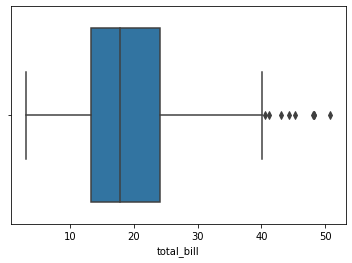

In [6]:
sns.boxplot(df.total_bill)

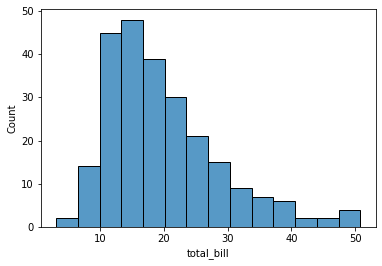

In [7]:
sns.histplot(df.total_bill)

In [8]:
# Sturge law to calculate the optimal number of bins
# 1 + log2(N)

N = df.shape[0]
n_bins = 1 + int(np.ceil(np.log2(N)))
n_bins

9

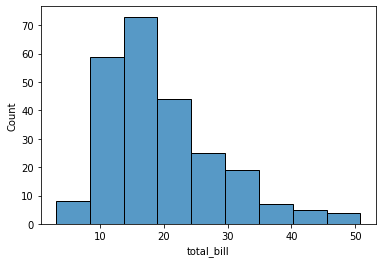

In [9]:
sns.histplot(df.total_bill,bins=n_bins)

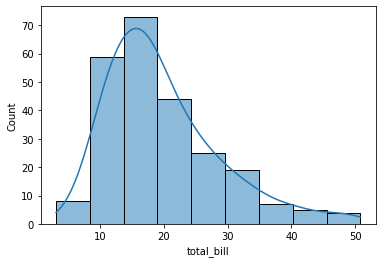

In [10]:
sns.histplot(df.total_bill,bins=n_bins,kde=True)

In [11]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


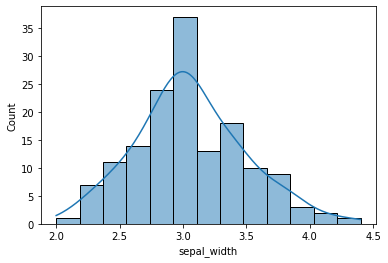

In [12]:
sns.histplot(df.sepal_width,kde=True)

In [13]:
np.percentile(df.sepal_width,q=[25,75])

array([2.8, 3.3])

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Removing outliers using std. approach

In [15]:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# Lets assume all the data above and below 3rd std. are ourliers

std = np.std(df.sepal_width)
mean = np.mean(df.sepal_width)
std,mean

(0.43441096773549437, 3.057333333333334)

In [16]:
data = df.sepal_width.values

mask1 = data > (mean+3*std)
mask2 = data < (mean - 3*std)
mask = (mask1 | mask2)

print("Number of Outliers:",sum(mask))

data = data[~mask]

Number of Outliers: 1


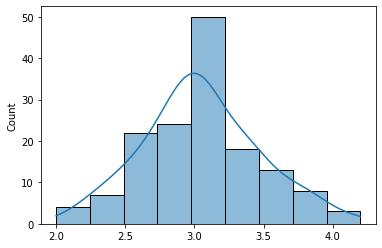

In [17]:
sns.histplot(data,bins=n_bins,kde=True)

# Removing outliers using IQR approach

In [18]:
data = df.sepal_width.values

q1,q3 = np.percentile(data,q=[25,75])
q1,q3

(2.8, 3.3)

In [19]:
iqr = q3 - q1

lower_fence = q1 - 1.5*iqr
higher_fence = q3 + 1.5*iqr

lower_fence,higher_fence 

(2.05, 4.05)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


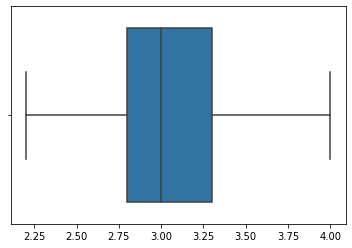

In [20]:
data = data[data >= lower_fence]
data = data[data <= higher_fence]
sns.boxplot(data)

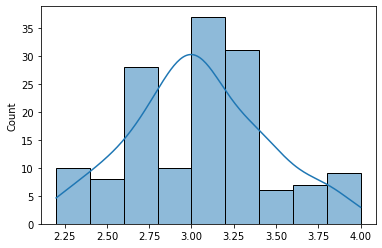

In [21]:
sns.histplot(data,bins=n_bins,kde=True)

# Z-test
In a colony of 100 people, weight of individuals was recorded and are given in population. The population mean and population standard deviation are stored in `pop_mean` & `pop_std` respectively. Now the govt. distributed free ration to the people for 6 six months and now wants to check whether the free food resulted in increase or decrease in weight of people. A sample of 30 people has a mean of 90. Did the free ration helped in gaining weight? Assume significance level to be 5%. 

In [56]:
population = np.random.randint(50,90,100) 
pop_mean = np.mean(population)
pop_std = np.std(population)

sample_mean = 90
sample_size = 30

pop_mean,pop_std

(68.32, 11.30387544163505)

1. H0 : population mean weight is same(No benefit at all)
2. H1 : population mean weight is changed
3. alpha = 0.05
4. It is a two tailed test because we have not given whether the weight can only be increased or decreased. 
5. Since Population std. is given, we will use Z-test to perform Hypothesis testing. 

In [57]:
# from statsmodels.stats.weightstats import ztest as ztest
# ztest(population,value=pop_mean)

In [59]:
z = (sample_mean - pop_mean)/(pop_std/np.sqrt(sample_size))
z

10.504914980728413

For 95% CI, the ztest score is 1.96. Above z-value is greater than this value. So, reject the null hypothesis. Population weight is changed(even increased)

# T-test

In [61]:
population = np.random.randint(50,90,100)
population_mean = np.mean(population)
population_mean

68.81

In [62]:
sample_size = 15
sample = np.random.choice(population,sample_size)
sample

array([84, 87, 65, 73, 67, 64, 58, 74, 87, 79, 53, 79, 76, 72, 55])